In [3]:
%pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


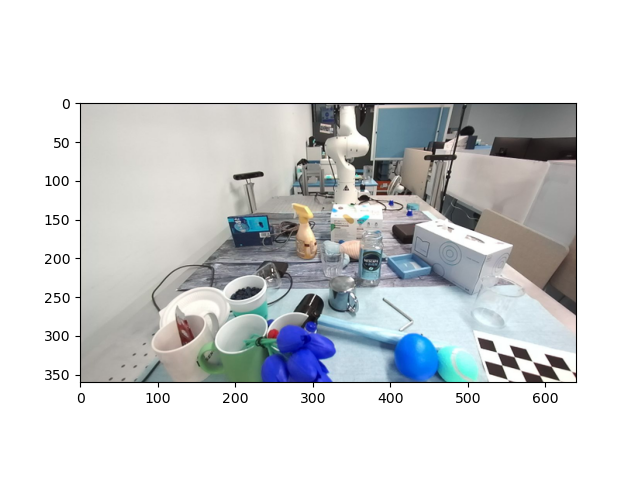

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg
from PIL import Image
import cv2

# Data processing
fig = plt.figure()
img_path = "../../../datasets/rospy_input_1021/rgb_1.png"
depth_path = "../../../datasets/rospy_input_1021/depth_1.png"
extr_path = "../../../datasets/rospy_input_1021/cam_1_extrinsics.npy"
intr_path = "../../../datasets/rospy_input_1021/intrinsics_1.npy"

img = Image.open(img_path).convert('RGB')
depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
extr = np.load(extr_path).astype(np.float32)
extr = extr @ np.diag([1, -1, -1, 1])
extr = np.linalg.inv(extr)
intr = np.load(intr_path).astype(np.float32)

new_width = img.width // 2
new_height = img.height // 2
img_half = img.resize((new_width, new_height), Image.Resampling.LANCZOS)

depth_half = cv2.resize(depth, (new_width, new_height), interpolation=cv2.INTER_NEAREST)

intr[0][0] = intr[0][0]/2
intr[0][2] = intr[0][2]/2 
intr[1][1] = intr[1][1]/2
intr[1][2] = intr[1][2]/2


# Lifting
H, W = depth_half.shape
N = H * W  # Total number of pixels

u, v = np.meshgrid(np.arange(W), np.arange(H), indexing='xy')
ones = np.ones_like(u)

pix = np.stack((u, v, ones), axis=-1).reshape(N, 3).astype(np.float32)

K_inv = np.linalg.inv(intr)  # (3, 3)
cam_coords_normalized = K_inv @ pix.T
cam_coords = cam_coords_normalized * depth_half.flatten().reshape(1, N)  # (3, N)


R = extr[:3, :3]
t = extr[:3, 3]  
world_coords = R.T @ (cam_coords - t.reshape(3, 1))  # (3, N)
pcd = world_coords.T.reshape(H, W, 3)

plt.imshow(img_half)

query_point_ls = []

def onclick(event):
    if event.xdata is None or event.ydata is None:
        return
    x_pixel = round(event.xdata)
    y_pixel = round(event.ydata)
    query_point_ls.append(pcd[y_pixel, x_pixel, :].copy())
    if(len(query_point_ls)==20):
        print(np.array(query_point_ls))
        np.save("../../../datasets/extrinsics/query_point.npy",np.array(query_point_ls))

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

In [26]:
plt.close('all')

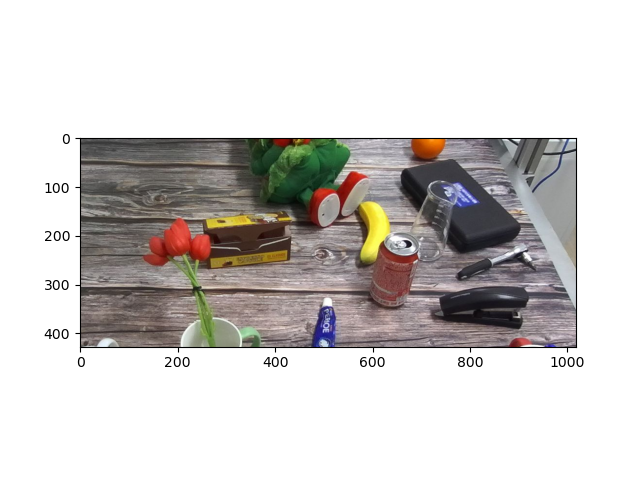

[[ 0.61797947 -0.10314816  0.06912535]
 [ 0.61950892 -0.09602878  0.07470445]
 [ 0.62399202 -0.07897968  0.07606969]
 [ 0.62536229 -0.05620225  0.07915078]
 [ 0.62420284 -0.05283384  0.08032446]
 [ 0.62122177 -0.03518645  0.08202596]
 [ 0.62220668 -0.02173498  0.07838056]
 [ 0.60101202 -0.01746655  0.04736642]
 [ 0.62241776 -0.01790978  0.04172945]
 [ 0.62331457 -0.0212845   0.0309926 ]
 [ 0.62691273 -0.03353624  0.02733291]
 [ 0.62815218 -0.06432717  0.01459046]
 [ 0.63055899 -0.09362904  0.00632592]
 [ 0.6285401  -0.09681001  0.0152975 ]
 [ 0.62889317 -0.05703517  0.02936581]
 [ 0.62784983 -0.03876644  0.03056936]
 [ 0.62098748 -0.00643103  0.03342653]
 [ 0.62182127 -0.00315325  0.04105617]
 [ 0.60523671  0.0008031   0.04619163]
 [ 0.60364917 -0.01410099  0.05181905]]


In [4]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg
from PIL import Image
import cv2

# Data processing
fig = plt.figure()
img_path = "../../../datasets/0926/1/rgb_00000.png"
depth_path = "../../../datasets/0926/1/depth_00000.npy"
extr_path = "../../../datasets/0926/1/extrinsic.npy"
intr_path = "../../../datasets/0926/1/intrinsic.npy"

img = Image.open(img_path).convert('RGB')
depth = np.load(depth_path).astype(np.float32)
extr = np.load(extr_path).astype(np.float32)
extr = extr @ np.diag([1, -1, -1, 1])
extr = np.linalg.inv(extr)
intr = np.load(intr_path).astype(np.float32)

# Lifting
H, W = depth.shape
N = H * W  # Total number of pixels

u, v = np.meshgrid(np.arange(W), np.arange(H), indexing='xy')
ones = np.ones_like(u)

pix = np.stack((u, v, ones), axis=-1).reshape(N, 3).astype(np.float32)

K_inv = np.linalg.inv(intr)  # (3, 3)
cam_coords_normalized = K_inv @ pix.T
cam_coords = cam_coords_normalized * depth.flatten().reshape(1, N)  # (3, N)


R = extr[:3, :3]
t = extr[:3, 3]  
world_coords = R.T @ (cam_coords - t.reshape(3, 1))  # (3, N)
pcd = world_coords.T.reshape(H, W, 3)

plt.imshow(img)

query_point_ls = []

def onclick(event):
    if event.xdata is None or event.ydata is None:
        return
    x_pixel = round(event.xdata)
    y_pixel = round(event.ydata)
    query_point_ls.append(pcd[y_pixel, x_pixel, :].copy())
    if(len(query_point_ls)==20):
        print(np.array(query_point_ls))
        np.save("../../../datasets/0926/video_input_query_point.npy",np.array(query_point_ls))

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)